In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

In [2]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select * from DG_Tables where Database_ID = 7"

In [3]:
#CONNECT AND EXTRACT DATA / INDIVIDUAL STEPS

conx = pyodbc.connect(conx_string);
cursor = conx.cursor();
cursor.execute(query);
data= cursor.fetchall()
print(data[:10])
conx.close()

[('\tDGT000173\t', '\tADDRESS\t', 7, '\tADDRESS_Table\t', datetime.date(2021, 11, 27), datetime.date(1900, 1, 1)), ('\tDGT000174\t', '\tEMPLOYEE\t', 7, '\tEMPLOYEE_Table\t', datetime.date(2021, 11, 27), datetime.date(1900, 1, 1)), ('\tDGT000175\t', '\tORDERS\t', 7, '\tORDERS_Table\t', datetime.date(2021, 11, 27), datetime.date(1900, 1, 1)), ('\tDGT000176\t', '\tPRODUCT\t', 7, '\tPRODUCT_Table\t', datetime.date(2021, 11, 27), datetime.date(1900, 1, 1)), ('\tDGT000177\t', '\tCUSTOMER\t', 7, '\tCUSTOMER_Table\t', datetime.date(2021, 11, 27), datetime.date(1900, 1, 1))]


In [7]:
with pyodbc.connect(conx_string) as conx:
    cursor = conx.cursor()
    cursor.execute('select * FROM  DG_Attributes')
    Query_One = cursor.fetchall()
    

df = pd.read_sql(query, conx)
print(df.head(26))


  SCHEMA_NAME  #Table  #Records
0        Book       5        22
1        Camp       5        28
2        FURN       8        30
3       GAMES       6        28
4        Prop       8        58
5       PUBCO      24        37
6          SP       3         9
7        SPJ2       6        25
8       Zeota      76       365


In [4]:
#ax = sns.countplot(x="schema_name", y= "count_fk", data=df)
%matplotlib inline

df.plot.bar(x='schema_name', y='count_fk', figsize=(20, 12))

NameError: name 'df' is not defined

# 1. For every schema, list Schema, # tables, # records

In [8]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select s.SCHEMA_NAME, count(distinct t.table_id) as #Table, count(a.Attributes_ID) #Records from DG_Attributes a inner join DG_Tables t on t.Table_ID = a.Table_id inner join DG_Schema s on s.schema_ID = t.Database_ID group by s.schema_name"

df = pd.read_sql(query, conx)
print(df)

  SCHEMA_NAME  #Table  #Records
0        Book       5        22
1        Camp       5        28
2        FURN       8        30
3       GAMES       6        28
4        Prop       8        58
5       PUBCO      24        37
6          SP       3         9
7        SPJ2       6        25
8       Zeota      76       365


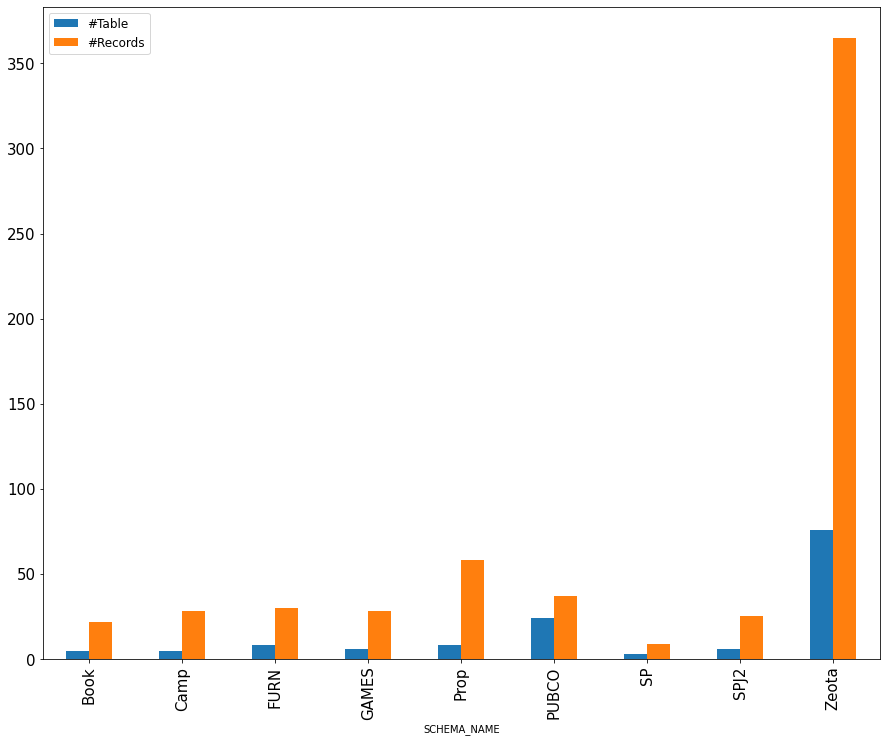

In [169]:
%matplotlib inline

ax =df.set_index('SCHEMA_NAME').plot(kind= 'bar', figsize=(15, 12) )





ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# 2. For every schema, list table name, # attributes,#  PK_ attr, # FK_ attr, # NN_attr, # IDX_attr, # CC_attr, # UQ_attrs, # PGM_attr

In [173]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select schema_name, count(a.attributes_Id) as NumberOfAttributes,count(p.pk_id) as NoOfPKs, count(f.fk_id) NoOfFKs,  count(c.cc_id) NoOfCCs, count(i.idx_id) NoOfIDXs, count(n.nn_id) NoOfNNs, count(pg.pgm_id) NoOfPGMs, count(u.uqi_id) NoOfUQIs from DG_Attributes a left outer join DG_Tables t on a.Table_id = t.Table_ID left outer join DG_Attributes_ConstCheck c on c.Attributes_ID = a.Attributes_ID left outer join DG_Attributes_FK f on f.Attributes_ID = a.Attributes_ID left outer join DG_Attributes_Index i on i.Attributes_ID = a.Attributes_ID left outer join DG_Attributes_NotNull n on n.Attributes_ID = a.Attributes_ID left outer join DG_Attributes_PK p  on p.Attributes_ID = a.Attributes_ID left outer join DG_Attributes_Program pg on  pg.Attributes_ID = a.Attributes_ID left outer join DG_Attributes_Unique u on u.Attributes_ID = a.Attributes_ID join DG_Schema s on t.Database_ID = s.schema_ID group by schema_name, t.Table_Name"

df = pd.read_sql(query, conx)
print(df)

    schema_name  NumberOfAttributes  NoOfPKs  NoOfFKs  NoOfCCs  NoOfIDXs  \
0          Camp                   5        1        0        1         4   
1         PUBCO                   1        0        0        0         0   
2         PUBCO                   1        0        0        0         0   
3         PUBCO                   3        0        0        0         0   
4         PUBCO                   2        0        0        0         0   
..          ...                 ...      ...      ...      ...       ...   
130       Zeota                   5        1        2        1         3   
131        Prop                   4        2        0        0         2   
132       Zeota                   6        1        2        0         3   
133       Zeota                   7        1        0        0         1   
134        Book                   3        2        2        0         0   

     NoOfNNs  NoOfPGMs  NoOfUQIs  
0          4         0         0  
1          0     

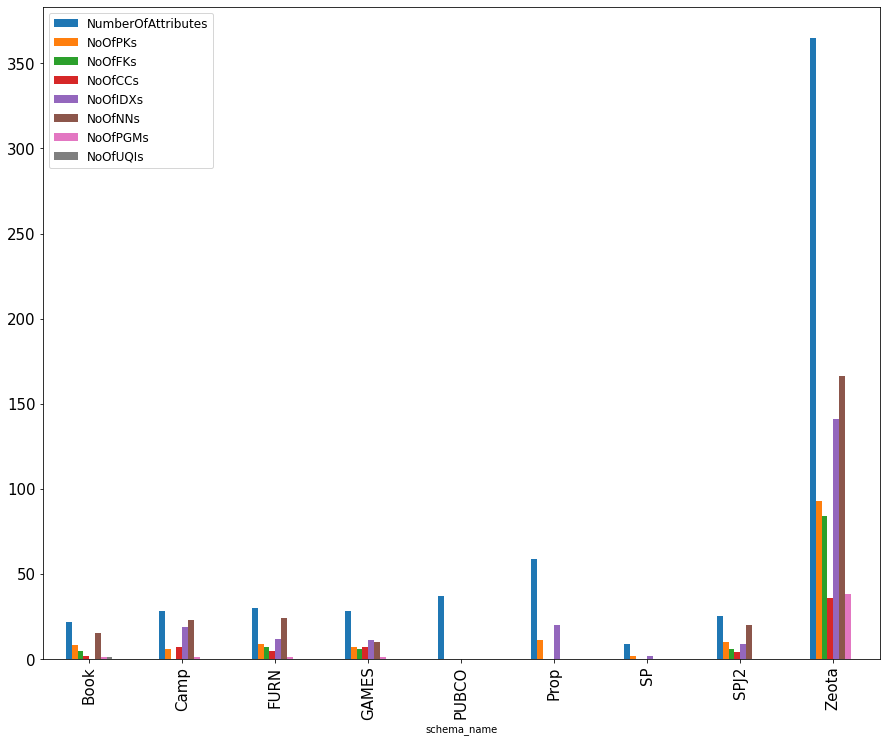

In [189]:
df1 = df.groupby(['schema_name']).sum().plot(kind= 'bar', figsize=(15, 12))
df1.tick_params(axis='x', labelsize=15)
df1.tick_params(axis='y', labelsize=15)

In [183]:
df1

,NumberOfAttributes,NoOfPKs,NoOfFKs,NoOfCCs,NoOfIDXs,NoOfNNs,NoOfPGMs,NoOfUQIs
schema_name,,,,,,,,
Book,22,8,5,2,0,15,1,1
Camp,28,6,0,7,19,23,1,0
FURN,30,9,7,5,12,24,1,0
GAMES,28,7,6,7,11,10,1,0
PUBCO,37,0,0,0,0,0,0,0
Prop,59,11,0,0,20,0,0,0
SP,9,2,0,0,2,0,0,0
SPJ2,25,10,6,4,9,20,0,0
Zeota,365,93,84,36,141,166,38,0


# 3. For every schema, list Table_ID, Table_Name, attribute_id, attribute_Name, PK_ID, FK_ID, NN_ID, constraint_type, and constraint_Name

In [ ]:
#DO THIS AGAIN

In [210]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select Database_ID,schema_name,count(Constraint_Type)as Not_Null from DG_Attributes_NotNull n inner join DG_Attributes a on a.Attributes_ID = n.Attributes_ID inner join DG_Tables t on t.Table_ID = a.Table_id inner join DG_schema s on s.schema_ID = t.database_id Group by Database_ID, schema_name"

df = pd.read_sql(query, conx)
print(df)

   Database_ID schema_name  Not_Null
0            1       Zeota       166
1            6        Book        15
2            7        Camp        23
3            8        FURN        24
4            9       GAMES        10
5           10        SPJ2        20


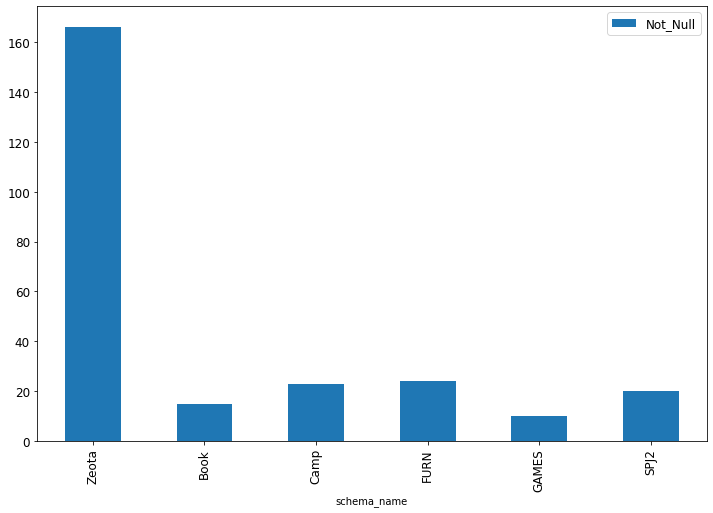

In [211]:
%matplotlib inline

df.plot.bar(x='schema_name', y='Not_Null', figsize=(12, 8))

# 4. For every schema, list tables with PK but without FK and IDX

In [190]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select distinct schema_name, t.table_name, Attributes_Name, p.PK_ID from DG_Attributes a inner join DG_Tables t on t.Table_ID = a.Table_id left outer join DG_Attributes_PK p on p.Attributes_ID = a.Attributes_ID left outer join (select Attributes_ID from DG_Attributes_FK) f on f.Attributes_ID = a.Attributes_ID left outer join (select Attributes_ID from DG_Attributes_Index) i on i.Attributes_ID = a.Attributes_ID join DG_Schema s on t.Database_ID = s.schema_ID where f.Attributes_ID is null and i.Attributes_ID is null and p.Attributes_ID is not null"
df = pd.read_sql(query, conx)
print(df)

   schema_name                  table_name Attributes_Name              PK_ID
0         Book                      AUTHOR      AUTHOR_NUM      DGC_PK_ID_172
1         Book                        Book       BOOK_CODE      DGC_PK_ID_170
2         Book                        Book  PUBLISHER_CODE      DGC_PK_ID_173
3         Book                      Branch      BRANCH_NUM      DGC_PK_ID_171
4        GAMES                 \tPRODUCT\t         \tPNO\t  \tDGC_PK_ID_196\t
5        Zeota  External_EMP_Certification       Recd_date       DGC_PK_ID_51
6        Zeota       External_EMP_Training      start_date       DGC_PK_ID_52
7        Zeota       Internal_EMP_Training      start_date       DGC_PK_ID_57
8        Zeota                      salary       Salary_No       DGC_PK_ID_80
9        Zeota               state_capital            city       DGC_PK_ID_83
10       Zeota                   User_Role      start_date       DGC_PK_ID_88


Text(0.5, 1.0, 'PK Without FK and IDX')

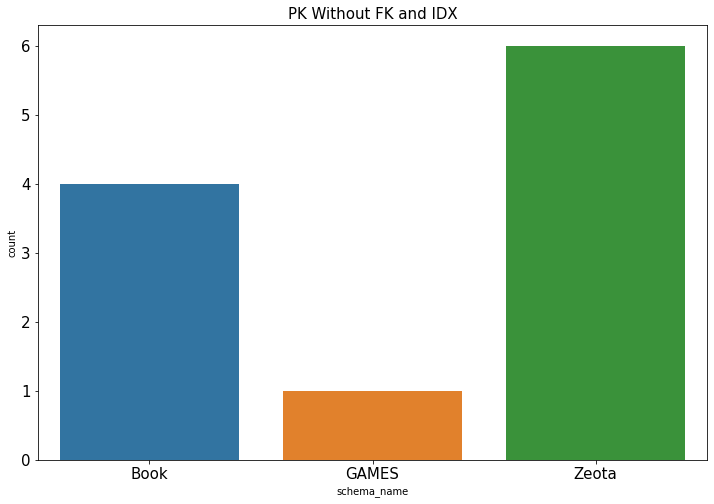

In [208]:
%matplotlib inline
plt.figure(figsize=(12, 8))

ax = sns.countplot(x='schema_name', data=df)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title("PK Without FK and IDX", fontsize=15)


# 5. For every database/schema, rank them according to number of NN (Not Null) have created


In [212]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select s.schema_name, rank () over (order by count (n.nn_id)) NN_Rank, count(n.nn_id) CountNN from DG_Attributes a inner join DG_Tables t on t.Table_ID = a.Table_id inner join DG_Schema s on s.schema_ID = t.Database_ID left outer join DG_Attributes_NotNull n on n.Attributes_ID = a.Attributes_ID group by s.schema_name"
df = pd.read_sql(query, conx)
print(df)

  schema_name  NN_Rank  CountNN
0        Prop        1        0
1       PUBCO        1        0
2          SP        1        0
3       GAMES        4       10
4        Book        5       15
5        SPJ2        6       20
6        Camp        7       23
7        FURN        8       24
8       Zeota        9      166


<Figure size 864x576 with 0 Axes>

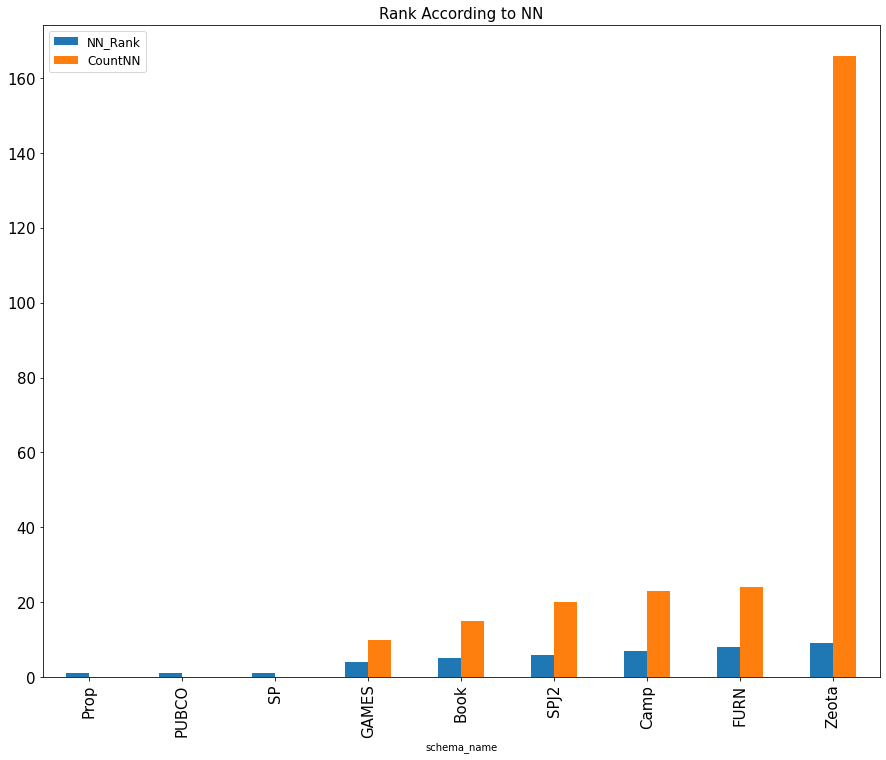

In [221]:
%matplotlib inline
plt.figure(figsize=(12, 8))



ax =df.set_index('schema_name').plot(kind= 'bar', figsize=(15, 12) )


ax.set_title("Rank According to NN", fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# 6. For every database, list tables without PK

In [259]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select schema_name, Table_Name from DG_Tables t join DG_Schema s on t.Database_ID = s.schema_ID where t.Table_Name not in ( select distinct t.table_name from DG_Attributes a inner join DG_Tables t on t.Table_ID = a.Table_id left outer join DG_Attributes_PK p on p.Attributes_ID = a.Attributes_ID left outer join (select Attributes_ID from DG_Attributes_FK) f on f.Attributes_ID = a.Attributes_ID left outer join (select Attributes_ID from DG_Attributes_Index) i on i.Attributes_ID = a.Attributes_ID join DG_Schema s on t.Database_ID = s.schema_ID where p.Attributes_ID is null)"
df = pd.read_sql(query, conx)
print(df)

  schema_name                  Table_Name
0       Zeota  External_EMP_Certification
1       Zeota                 Dept_Branch
2        Book                   PUBLISHER


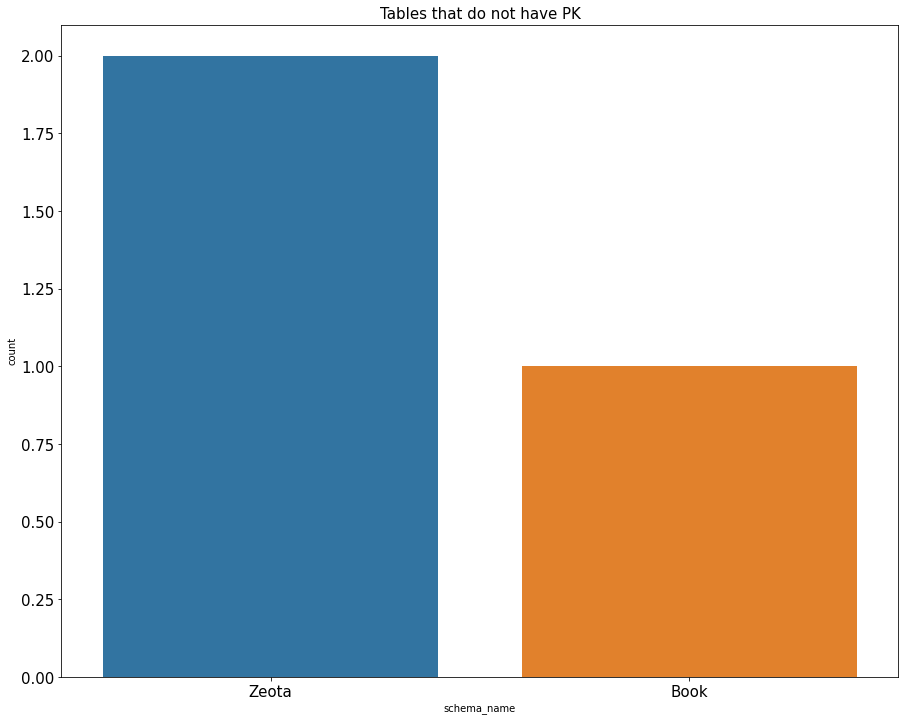

In [260]:
%matplotlib inline
plt.figure(figsize=(15, 12))


ax = sns.countplot(x ='schema_name', data=df)

ax.set_title("Tables that do not have PK", fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# 7. For every database, list tables without IDX

In [261]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select schema_name, Table_Name from DG_Tables t join DG_Schema s on t.Database_ID = s.schema_ID where t.Table_Name not in ( select distinct t.table_name from DG_Attributes a inner join DG_Tables t on t.Table_ID = a.Table_id left outer join DG_Attributes_PK p on p.Attributes_ID = a.Attributes_ID left outer join (select Attributes_ID from DG_Attributes_FK) f on f.Attributes_ID = a.Attributes_ID left outer join (select Attributes_ID from DG_Attributes_Index) i on i.Attributes_ID = a.Attributes_ID join DG_Schema s on t.Database_ID = s.schema_ID where i.Attributes_ID is null)"


df = pd.read_sql(query, conx)
print(df)

  schema_name            Table_Name
0        FURN  \tPRODUCT_CATEGORY\t
1       GAMES               \tJOB\t
2        SPJ2                 \tW\t
3       Zeota              Training
4       Zeota           Dept_Branch
5        Book             PUBLISHER


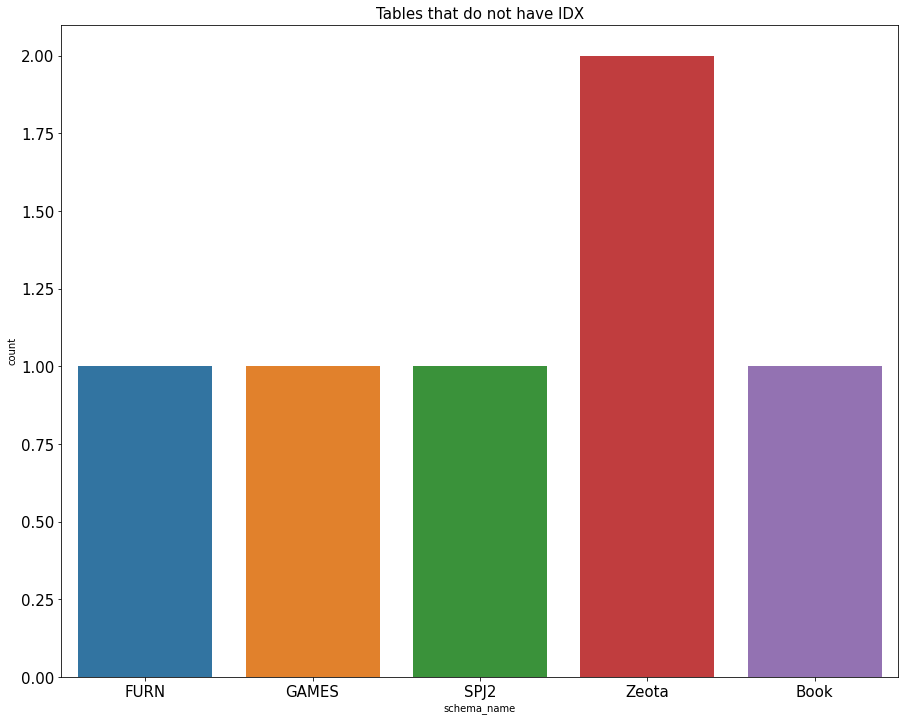

In [262]:
%matplotlib inline
plt.figure(figsize=(15, 12))


ax = sns.countplot(x ='schema_name', data=df)

ax.set_title("Tables that do not have IDX", fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# 8. For every database, list tables with PK but without FK

In [242]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select distinct schema_name, t.table_name, Attributes_Name, p.PK_ID, f.Attributes_ID as FK_ID, i.Attributes_ID as IDX_ID from DG_Attributes a inner join DG_Tables t on t.Table_ID = a.Table_id left outer join DG_Attributes_PK p on p.Attributes_ID = a.Attributes_ID left outer join (select Attributes_ID from DG_Attributes_FK) f on f.Attributes_ID = a.Attributes_ID left outer join (select Attributes_ID from DG_Attributes_Index) i on i.Attributes_ID = a.Attributes_ID join DG_Schema s on t.Database_ID = s.schema_ID where f.Attributes_ID is null and p.Attributes_ID is not null"

df = pd.read_sql(query, conx)
print(df)

   schema_name          table_name Attributes_Name              PK_ID FK_ID  \
0         Book              AUTHOR      AUTHOR_NUM      DGC_PK_ID_172  None   
1         Book                Book       BOOK_CODE      DGC_PK_ID_170  None   
2         Book                Book  PUBLISHER_CODE      DGC_PK_ID_173  None   
3         Book              Branch      BRANCH_NUM      DGC_PK_ID_171  None   
4         Camp         \tADDRESS\t       \tADDID\t  \tDGC_PK_ID_176\t  None   
..         ...                 ...             ...                ...   ...   
90       Zeota              VENDOR       VENDOR_NO       DGC_PK_ID_89  None   
91       Zeota  Vendor_QTYDISCOUNT  QTYDISCOUNT_NO       DGC_PK_ID_90  None   
92       Zeota         VENDORPRICE       VPRICE_NO       DGC_PK_ID_91  None   
93       Zeota     Vndor_PROMOTION            VPID       DGC_PK_ID_92  None   
94       Zeota           Warehouse    warehouse_no       DGC_PK_ID_93  None   

             IDX_ID  
0              None  
1      

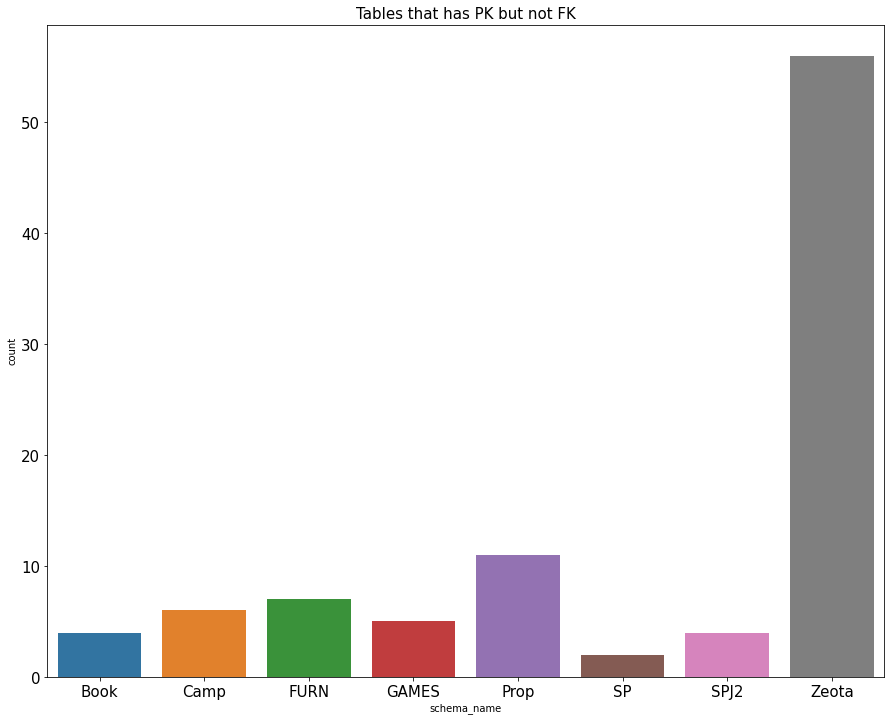

In [243]:
%matplotlib inline
plt.figure(figsize=(15, 12))


ax = sns.countplot(x ='schema_name', data=df)

ax.set_title("Tables that has PK but not FK", fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# 9. For every database/schema, list tables with PK but without IDX

In [244]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "Select schema_name, t.Table_Name, a.Attributes_Name, p.PK_ID,u.IDX_ID From DG_Attributes a inner join DG_Attributes_PK p on a.Attributes_ID=p.Attributes_ID left outer join DG_Attributes_Index u on a.Attributes_ID=u.Attributes_ID join DG_Tables t on a.Table_id = t.Table_ID join DG_Schema s on t.Database_ID = s.schema_ID where u.Attributes_ID is null order by a.Table_id;"

df = pd.read_sql(query, conx)
print(df)

   schema_name                  Table_Name Attributes_Name              PK_ID  \
0         FURN              \tORDER_LINE\t         \tPNO\t  \tDGC_PK_ID_186\t   
1         FURN              \tORDER_LINE\t    \tORDER_ID\t  \tDGC_PK_ID_187\t   
2        GAMES              \tORDER_LINE\t         \tONO\t  \tDGC_PK_ID_194\t   
3        GAMES              \tORDER_LINE\t         \tPNO\t  \tDGC_PK_ID_195\t   
4        GAMES                 \tPRODUCT\t         \tPNO\t  \tDGC_PK_ID_196\t   
5         SPJ2                     \tSPW\t          \tS#\t  \tDGC_PK_ID_205\t   
6         SPJ2                     \tSPW\t          \tP#\t  \tDGC_PK_ID_206\t   
7         SPJ2                     \tSPW\t          \tW#\t  \tDGC_PK_ID_207\t   
8         SPJ2                     \tSPJ\t          \tS#\t  \tDGC_PK_ID_208\t   
9         SPJ2                     \tSPJ\t          \tP#\t  \tDGC_PK_ID_209\t   
10        SPJ2                     \tSPJ\t          \tJ#\t  \tDGC_PK_ID_210\t   
11       Zeota  External_EMP

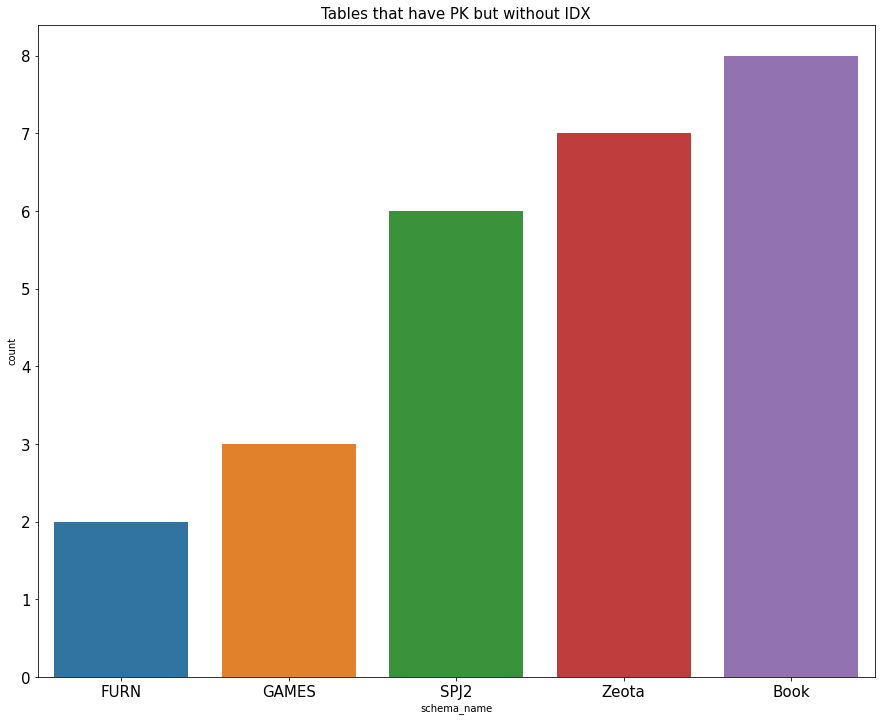

In [246]:
%matplotlib inline
plt.figure(figsize=(15, 12))


ax = sns.countplot(x ='schema_name', data=df)

ax.set_title("Tables that have PK but without IDX", fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# 10. For every database/schema, list tables with CC

In [247]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "SELECT s.schema_name, t.Table_Name, a.Attributes_Name, c.CC_ID FROM DG_Attributes a inner join DG_Attributes_ConstCheck c on a.Attributes_ID = c.Attributes_ID join DG_Tables t on a.Table_id = t.Table_ID join DG_Schema s on t.Database_ID = s.schema_ID"
df = pd.read_sql(query, conx)
print(df)

   schema_name          Table_Name Attributes_Name             CC_ID
0         Camp         \tADDRESS\t       \tSTATE\t  \tDGC_CC_ID_51\t
1         Camp        \tEMPLOYEE\t     \tEMP_SEX\t  \tDGC_CC_ID_52\t
2         Camp        \tEMPLOYEE\t  \tEMP_STATUS\t  \tDGC_CC_ID_53\t
3         FURN        \tEMPLOYEE\t     \tEMP_SEX\t  \tDGC_CC_ID_53\t
4         Camp          \tORDERS\t   \tORDER_QTY\t  \tDGC_CC_ID_54\t
..         ...                 ...             ...               ...
56        Book          INVENTORYr         ON_HAND      DGC_CC_ID_50
57       Zeota  Vendor_QTYDISCOUNT         D_PRICE       DGC_CC_ID_6
58       Zeota  Vendor_QTYDISCOUNT         MIN_QTY       DGC_CC_ID_7
59       Zeota         VENDORPRICE          VPRICE       DGC_CC_ID_8
60       Zeota            CUSTOMER           STATE       DGC_CC_ID_9

[61 rows x 4 columns]


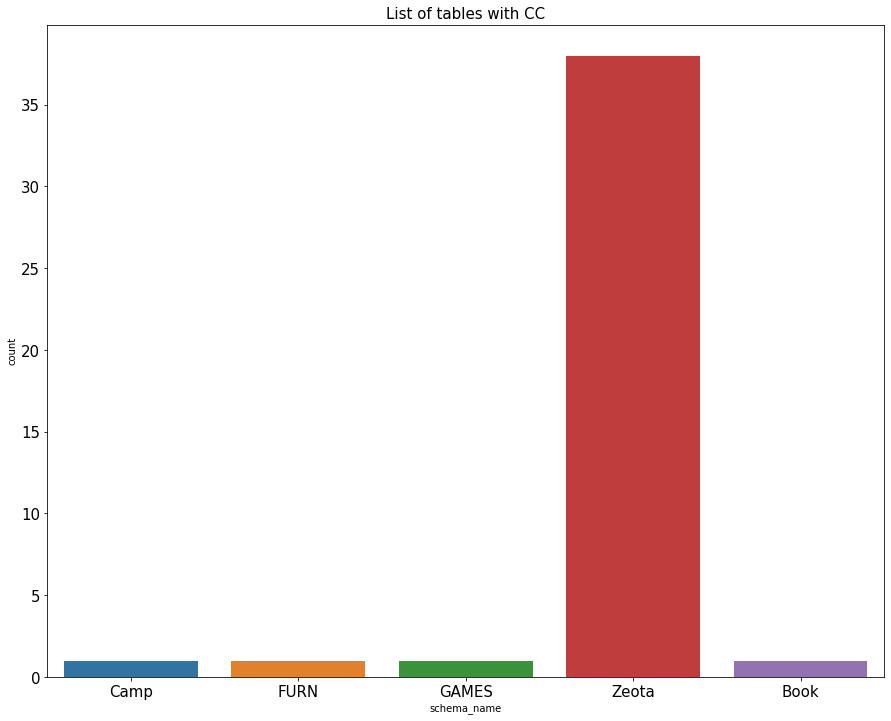

In [252]:
%matplotlib inline
plt.figure(figsize=(15, 12))


ax = sns.countplot(x ='schema_name', data=df)

ax.set_title("List of tables with CC", fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# 11. For every database/schema, list tables with PGM

In [253]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "SELECT s.schema_name, t.Table_Name, a.Attributes_Name, p.PGM_ID FROM DG_Attributes a inner join DG_Attributes_Program p on a.Attributes_ID = p.Attributes_ID join DG_Tables t on a.Table_id = t.Table_ID join DG_Schema s on t.Database_ID = s.schema_ID"
df = pd.read_sql(query, conx)
print(df)

   schema_name               Table_Name        Attributes_Name  \
0         Camp               \tORDERS\t    \tCUST_ORDER_DATE\t   
1         FURN               \tORDERS\t    \tCUST_ORDER_DATE\t   
2        GAMES               \tORDERS\t         \tORDER_DATE\t   
3        Zeota              EMP_payroll                 amount   
4        Zeota               RETURNPROD        AMOUNT_REFUNDED   
5        Zeota              EMP_payroll                 Emp_NO   
6        Zeota              EMP_payroll             payroll_NO   
7        Zeota         Sales_commission                 Emp_NO   
8        Zeota         Sales_commission               order_NO   
9        Zeota                User_Role             start_date   
10       Zeota                backorder                bo_date   
11       Zeota                backorder                 bo_qty   
12       Zeota                   ORDERS             ORDER_DATE   
13       Zeota               PRODVENDOR             ORDER_DATE   
14       Z

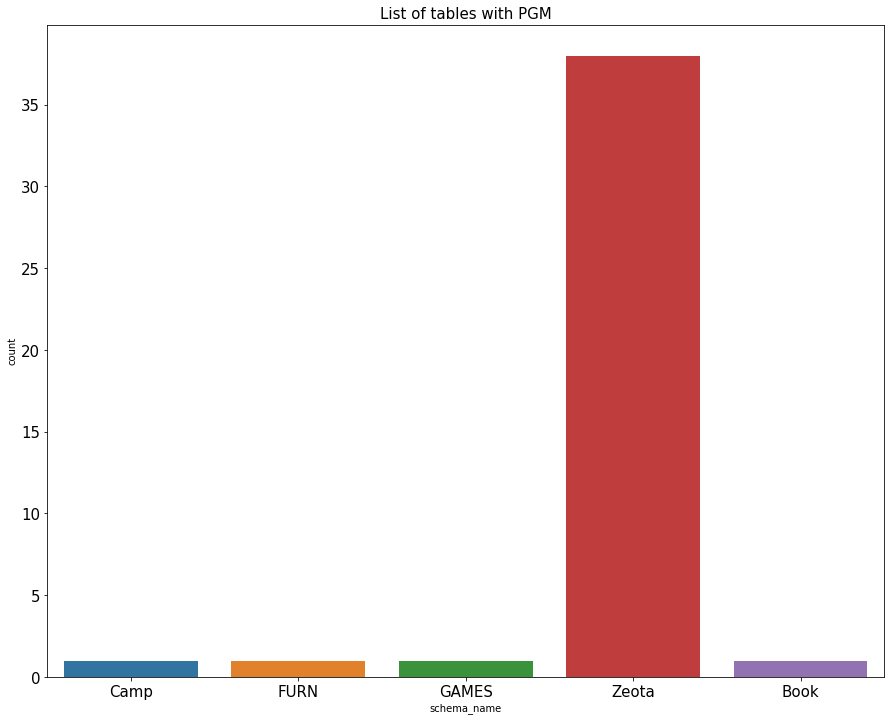

In [254]:
%matplotlib inline
plt.figure(figsize=(15, 12))


ax = sns.countplot(x ='schema_name', data=df)

ax.set_title("List of tables with PGM", fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# 12. For every database/schema, list all views (View name, View description)

# 13. For every database/schema, list all table with audit table

In [160]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select s.schema_name, t.table_name from DG_Tables t inner join DG_Schema s on s.schema_ID = t.Database_ID inner join DG_Audit_Table a on a.Table_ID = t.Table_ID group by s.schema_name, t.Table_Name"

df = pd.read_sql(query, conx)
print(df)

  schema_name               table_name
0       Zeota                   ORDERS
1       Zeota                  PRODUCT
2       Zeota  Return_Sales_Commission
3       Zeota               RETURNPROD
4       Zeota                    Roles
5       Zeota         Sales_commission
6       Zeota                   Skill 


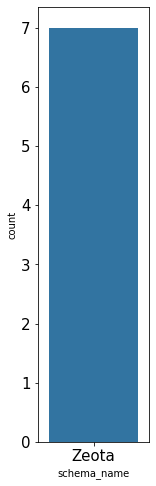

In [163]:

%matplotlib inline

ax = sns.countplot(x="schema_name", data=df)
plt.gcf().set_size_inches(2, 8)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)



#ax = df.plot.bar(x='schema_name', y='table_name', figsize=(15, 12))

# 14. For every database/schema, list schema, users, role, Dept

In [165]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select count(status) as ZEOTA, Count (schema_name) as Zeota, COUNT (DISTINCT ROLE_NAME) AS Roles, COUNT (DISTINCT Unit_name) as Dept from DG_User_Database d inner join DG_Schema s on s.schema_ID = d.Database_ID inner join DG_Users u on u.User_ID = d.User_ID inner join DG_User_Unit_Role ur on ur.User_ID = u.User_ID inner join DG_Role r on r.Role_ID = ur.Role_ID inner join DG_Unit un on un.Unit_ID = ur.Unit_ID"

df = pd.read_sql(query, conx)
print(df)

   ZEOTA  Zeota  Roles  Dept
0     88     88      9     9


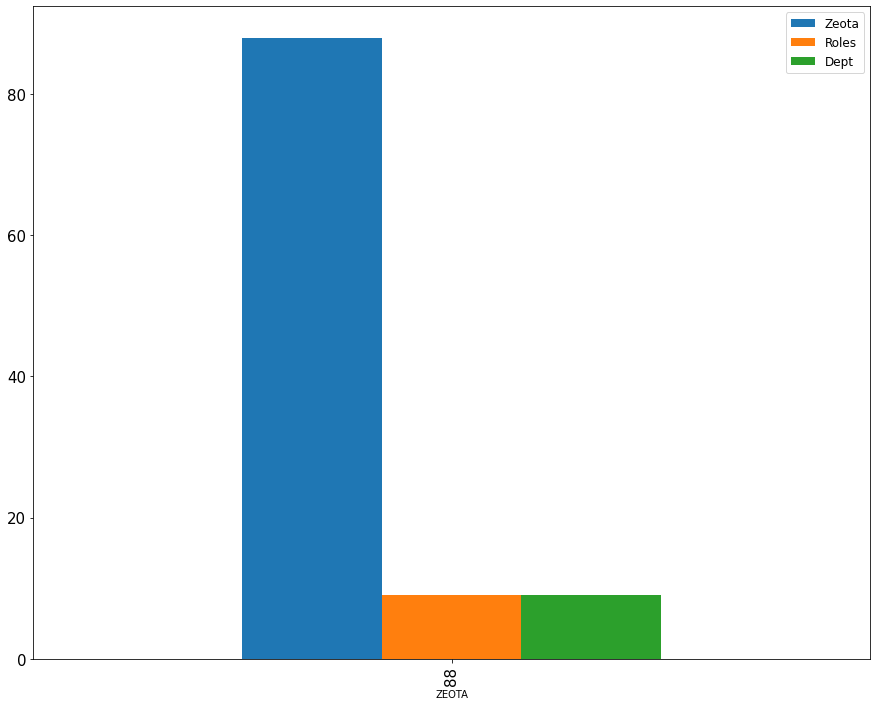

In [166]:
import matplotlib.pyplot as plt


ax =df.set_index('ZEOTA').plot(kind= 'bar', figsize=(15, 12) )


ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)


# 15. For every database/schema, list schema equipped with triggers to manage change in users

# 16. For every database/schema, list schema, dept, role, tables

In [255]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select t.table_name as TableName, s.schema_name, r.role_name as Roles, un.unit_name as Dept from DG_tables t inner join DG_Unit_Role_Table ur on ur.Table_id = t.Table_ID inner join DG_Schema s on s.schema_ID = t.Database_ID inner join DG_Role r on r.Role_ID = ur.Role_ID inner join DG_Unit un on un.Unit_ID = ur.Unit_ID group by t.Table_Name, s.schema_name, r.Role_Name, un.Unit_Name"
df = pd.read_sql(query, conx)
print(df)


           TableName schema_name                      Roles               Dept
0          backorder       Zeota              Sales Manager              Sales
1          backorder       Zeota                Sales Staff              Sales
2             BRANCH       Zeota              Sales Manager              Sales
3             BRANCH       Zeota                Sales Staff              Sales
4        Branch_Size       Zeota              Sales Manager              Sales
..               ...         ...                        ...                ...
133      VENDORPRICE       Zeota           Purchasing Staff         Purchasing
134  Vndor_PROMOTION       Zeota          Marketing Manager          Marketing
135  Vndor_PROMOTION       Zeota            Marketing Staff          Marketing
136        Warehouse       Zeota  Product-Warehouse Manager  Product_Warehouse
137        Warehouse       Zeota    Product-Warehouse Staff  Product_Warehouse

[138 rows x 4 columns]


# 17. For every database/schema, list schemas equipped with triggers to manage change in dept/tables

In [9]:
pyodbc.drivers() #Create a variable to store the connection string 

conx_string = "driver={SQL Server Native Client 11.0}; server=DESKTOP-HJQMQKK; database=DGDB; trusted_connection=YES"
query = "select s.schema_name, t.table_name, tr.tname, u.unit_name as Dept from DG_Unit u inner join DG_Unit_Role_Table un on un.Unit_ID = u.Unit_ID inner join DG_Base_Trigger_Table tr on tr.Table_ID = un.Table_id inner join DG_Tables t on t.Table_ID = tr.Table_ID inner join DG_Schema s on s.schema_ID = t.Database_ID group by s.schema_name, t.table_name, tr.tname, u.unit_name"
df = pd.read_sql(query, conx)
print(df)

  schema_name               table_name                            tname  \
0       Zeota                   ORDERS             ORDERS_BEFORE_UPDATE   
1       Zeota                  PRODUCT                  product_UPDATE    
2       Zeota  Return_Sales_Commission  return_sales_commission_before    
3       Zeota               RETURNPROD        returnprod_BEFORE_UPDATE    
4       Zeota         Sales_commission         sales_commission_before    

                Dept  
0              Sales  
1  Product_Warehouse  
2          Marketing  
3              Sales  
4          Marketing  


# 18. For every database/schema, list schemas equipped with triggers to manage volation severity